In [ ]:
#%pip install xgboost

In [2]:
%pip install --upgrade xgboost

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [3]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [4]:
#load data
dataset = loadtxt('Breast_cancer_data.csv', delimiter=",", skiprows=1)

In [5]:
#split data into causes(x) and effect(y aka diabetes)
        #rows, columns
print(dataset.shape)
X = dataset[:,0:5]
Y = dataset[:,5]

(569, 6)


In [6]:
#split into train and test
seed = 7
test_size = .33
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=test_size, random_state=seed)

In [7]:
#Parameters for XGBClassifier: https://xgboost.readthedocs.io/en/latest/parameter.html

model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [8]:
print(model)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)


In [9]:
# Test
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [10]:
# Grade test
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 92.02%


In [11]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall for cancer prediction: {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")

Confusion Matrix:
[[ 50   9]
 [  6 123]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.85      0.87        59
         1.0       0.93      0.95      0.94       129

    accuracy                           0.92       188
   macro avg       0.91      0.90      0.91       188
weighted avg       0.92      0.92      0.92       188

Accuracy: 0.9202
Precision: 0.9318
Recall for cancer prediction: 0.9535
F1 Score: 0.9425


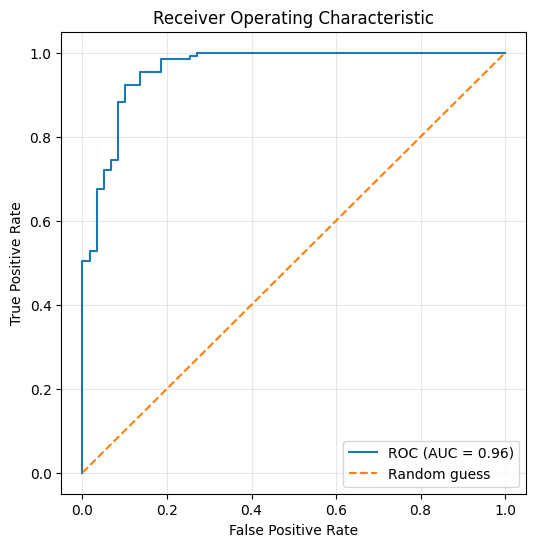

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get prediction probabilities
y_score = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f'ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()
